<a href="https://colab.research.google.com/github/ju-ki/atma10/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
sns.set()

In [3]:
INPUT_PATH = "/content/drive/MyDrive/atmacup10/data/raw/"
OUTPUT_PATH = "/content/drive/MyDrive/atmacup10/data/submission/"

In [4]:
train = pd.read_csv(INPUT_PATH + "train.csv")
test = pd.read_csv(INPUT_PATH + "test.csv")
print(train.shape, test.shape)

(12026, 19) (12008, 18)


In [5]:
print(train.info())
print("-"*50)
print(test.info())#直直欠損値がある.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   object_id                 12026 non-null  object 
 1   art_series_id             12026 non-null  object 
 2   title                     12026 non-null  object 
 3   description               8506 non-null   object 
 4   long_title                12026 non-null  object 
 5   principal_maker           12026 non-null  object 
 6   principal_or_first_maker  12025 non-null  object 
 7   sub_title                 11992 non-null  object 
 8   copyright_holder          713 non-null    object 
 9   more_title                11891 non-null  object 
 10  acquisition_method        11830 non-null  object 
 11  acquisition_date          11009 non-null  object 
 12  acquisition_credit_line   3525 non-null   object 
 13  dating_presenting_date    12016 non-null  object 
 14  dating

In [6]:
display(train.describe())
display(test.describe())

,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
count,12016.000000,12026.000000,12016.000000,11988.000000,12026.000000
mean,1769.769724,18.112673,1769.769724,1783.393143,81.915932
std,122.237041,1.353530,122.237041,122.344180,641.094570
min,1250.000000,-2.000000,1250.000000,1250.000000,0.000000
25%,1657.750000,17.000000,1657.750000,1672.000000,0.000000
50%,1808.000000,19.000000,1808.000000,1826.000000,3.000000
75%,1872.000000,19.000000,1872.000000,1890.000000,12.000000
max,2011.000000,21.000000,2011.000000,2011.000000,27392.000000


,dating_sorting_date,dating_period,dating_year_early,dating_year_late
count,12000.000000,12008.000000,12000.000000,11977.000000
mean,1771.248750,18.128331,1771.248750,1785.132587
std,121.558865,1.321395,121.558865,121.664020
min,1290.000000,-2.000000,1290.000000,1290.000000
25%,1660.000000,17.000000,1660.000000,1674.000000
50%,1810.000000,19.000000,1810.000000,1830.000000
75%,1873.000000,19.000000,1873.000000,1890.000000
max,2010.000000,21.000000,2010.000000,2010.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


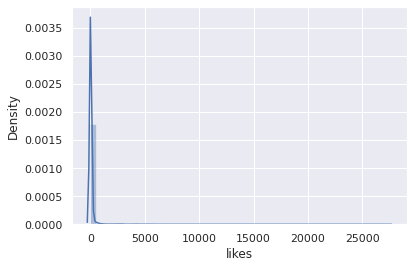

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


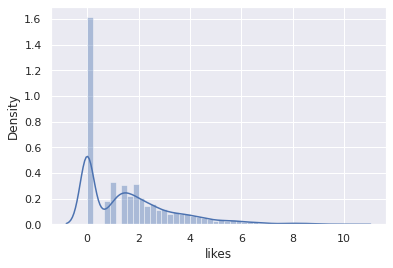

In [7]:
plt.subplots()
sns.distplot(train["likes"])
plt.show()

plt.subplots()
sns.distplot(np.log1p(train["likes"]))
plt.show()
#かなり偏りがある、log変換しても正規分布にはならない

In [8]:
def plot_intersection(left, right, column, set_labels, ax=None):
    left_set = set(left[column])
    right_set = set(right[column])
    venn2(subsets=(left_set, right_set), set_labels=set_labels, ax=ax)
    return ax

def plot_right_left_intersection(train_df, test_df, columns='__all__'):
    """2つのデータフレームのカラムの共通集合を可視化"""
    if columns == '__all__':
        columns = set(train_df.columns) & set(test_df.columns)

    columns = list(columns)
    nfigs = len(columns)
    ncols = 6
    nrows = - (- nfigs // ncols)
    fig, axes = plt.subplots(figsize=(3 * ncols, 3 * nrows), ncols=ncols, nrows=nrows)
    axes = np.ravel(axes)
    for c, ax in zip(columns, axes):
        plot_intersection(train_df, test_df, column=c, set_labels=('Train', 'Test'), ax=ax)
        ax.set_title(c)
    return fig, ax

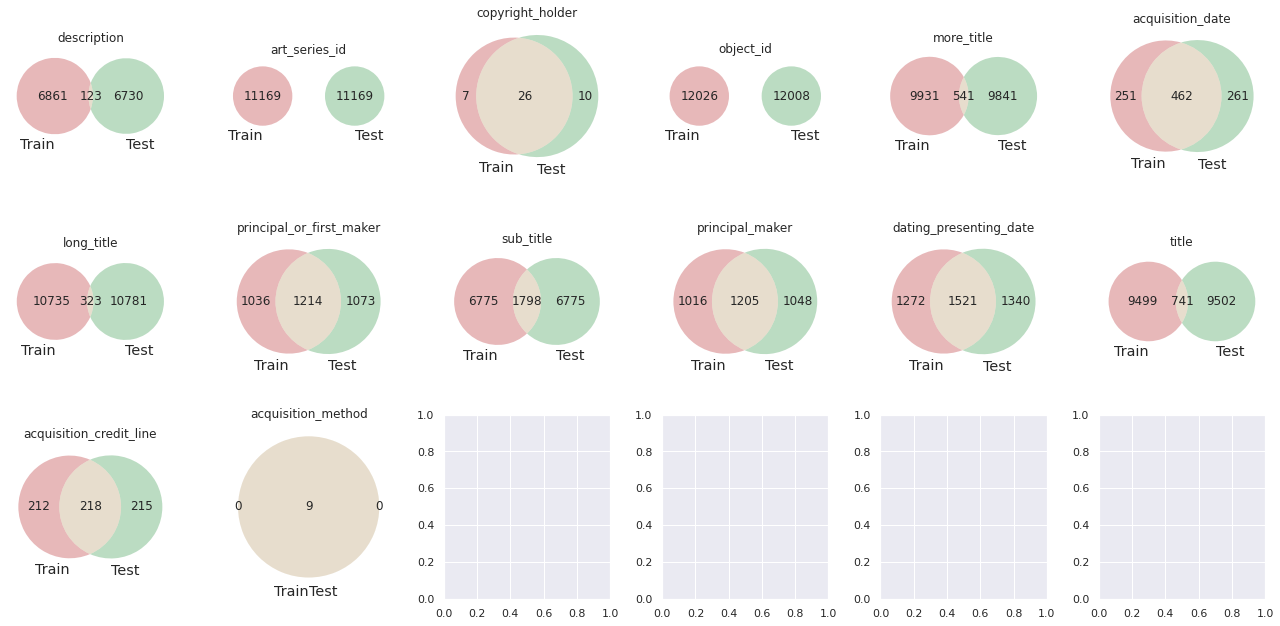

In [9]:
fig_features = ['object_id', 'art_series_id', 'title', 'description', 'long_title',
                'principal_maker', 'principal_or_first_maker', 'sub_title', 
                'copyright_holder', 'more_title', 'acquisition_method',
                'acquisition_date', 'acquisition_credit_line',
                'dating_presenting_date']

train_fig = train[fig_features]
test_fig = test[fig_features]
fig, _ = plot_right_left_intersection(train_fig, test_fig)
fig.tight_layout()#かなりばらけているがtitleなどは被るのはどうなのか→同じ作品

In [10]:
def load_multi_file(data_path, extension="*", num=3):

  list_dir = os.path.join(data_path, extension)
  list_data = glob.glob(list_dir)
  for file in list_data:
    data = pd.read_csv(file)
    print(f'{file}:{data.shape}')

load_multi_file(INPUT_PATH)

/content/drive/MyDrive/atmacup10/data/raw/train.csv:(12026, 19)
/content/drive/MyDrive/atmacup10/data/raw/principal_maker.csv:(24538, 6)
/content/drive/MyDrive/atmacup10/data/raw/maker.csv:(3291, 6)
/content/drive/MyDrive/atmacup10/data/raw/material.csv:(35394, 2)
/content/drive/MyDrive/atmacup10/data/raw/production_place.csv:(17686, 2)
/content/drive/MyDrive/atmacup10/data/raw/principal_maker_occupation.csv:(25372, 2)
/content/drive/MyDrive/atmacup10/data/raw/technique.csv:(20481, 2)
/content/drive/MyDrive/atmacup10/data/raw/historical_person.csv:(6745, 2)
/content/drive/MyDrive/atmacup10/data/raw/test.csv:(12008, 18)
/content/drive/MyDrive/atmacup10/data/raw/object_collection.csv:(14210, 2)
/content/drive/MyDrive/atmacup10/data/raw/color.csv:(73636, 3)
/content/drive/MyDrive/atmacup10/data/raw/atmacup10__sample_submission.csv:(12008, 1)
/content/drive/MyDrive/atmacup10/data/raw/palette.csv:(527890, 5)


In [11]:
color = pd.read_csv(INPUT_PATH + "color.csv")
color.head()

,object_id,percentage,hex
0,001020bd00b149970f78,0,#C7C7B6
1,001020bd00b149970f78,9,#5E5333
2,001020bd00b149970f78,14,#3E321B
3,001020bd00b149970f78,3,#B8AF84
4,001020bd00b149970f78,62,#15120C


In [12]:
history = pd.read_csv(INPUT_PATH + "historical_person.csv")
history.head()#オブジェクトに対しての作者の名前

,object_id,name
0,00133be3ff222c9b74b0,Staten-Generaal
1,00133be3ff222c9b74b0,"Álvarez de Toledo, Fernando (3e hertog van Alva)"
2,0026e030a0209b834b3e,Raad van Beroerten
3,0026e030a0209b834b3e,"Álvarez de Toledo, Fernando (3e hertog van Alva)"
4,00440ec5a4783b4b6bdb,Dolle Mina


In [13]:
maker = pd.read_csv(INPUT_PATH + "maker.csv")
maker.head()#作者の情報?

,name,place_of_birth,date_of_birth,date_of_death,place_of_death,nationality
0,'t Hooft,NaN,NaN,NaN,NaN,NaN
1,A. & G. Taylor,NaN,NaN,NaN,NaN,NaN
2,A. Böeseken,'s-Heerenberg,1834-01-12,1919-02-11,Rotterdam,NaN
3,A. Cucumus & Cie.,NaN,NaN,NaN,NaN,NaN
4,A. Dandoy,NaN,NaN,NaN,NaN,NaN


In [14]:
pri_maker = pd.read_csv(INPUT_PATH + "principal_maker.csv")
pri_maker.head()#主要な情報

,id,object_id,qualification,roles,productionPlaces,maker_name
0,1,000405d9a5e3f49fc49d,mentioned on object,NaN,NaN,Bernardus Bruining
1,2,001020bd00b149970f78,workshop of,painter,NaN,Jan Antonisz van Ravesteyn
2,3,0011d6be41612ec9eae3,NaN,painter,NaN,Jan Hackaert
3,4,0012765f7a97ccc3e9e9,attributed to,NaN,Netherlands,Richard Tepe
4,5,00133be3ff222c9b74b0,NaN,print maker,Northern Netherlands,Theodoor Koning


In [15]:
palette = pd.read_csv(INPUT_PATH + "palette.csv")
palette.head()#色の詳細な情報

,ratio,color_r,color_g,color_b,object_id
0,0.013781,40,4,0,000405d9a5e3f49fc49d
1,0.040509,221,189,129,000405d9a5e3f49fc49d
2,0.036344,207,175,117,000405d9a5e3f49fc49d
3,0.033316,230,197,129,000405d9a5e3f49fc49d
4,0.039600,194,161,106,000405d9a5e3f49fc49d


In [16]:
material = pd.read_csv(INPUT_PATH + "material.csv")
material.head()#素材

,object_id,name
0,000405d9a5e3f49fc49d,photographic paper
1,000405d9a5e3f49fc49d,cardboard
2,001020bd00b149970f78,oil paint (paint)
3,001020bd00b149970f78,panel
4,0011d6be41612ec9eae3,oil paint (paint)


In [17]:
place = pd.read_csv(INPUT_PATH + "production_place.csv")
place.head()

,object_id,name
0,0012765f7a97ccc3e9e9,Netherlands
1,00133be3ff222c9b74b0,Amsterdam
2,00133be3ff222c9b74b0,Northern Netherlands
3,0017be8caa87206532cb,Amsterdam
4,001b2b8c9d3aa1534dfe,Suriname


In [18]:
obj = pd.read_csv(INPUT_PATH + "object_collection.csv")
obj.head()

,object_id,name
0,001020bd00b149970f78,paintings
1,0011d6be41612ec9eae3,paintings
2,00133be3ff222c9b74b0,prints
3,00181d86ff1a7b95864e,paintings
4,001c52ae28ec106d9cd5,paintings


In [19]:
tech = pd.read_csv(INPUT_PATH + "technique.csv")
tech.head()

,object_id,name
0,000405d9a5e3f49fc49d,albumen print
1,0012765f7a97ccc3e9e9,salted paper print
2,0012765f7a97ccc3e9e9,albumen print
3,00133be3ff222c9b74b0,etching
4,0017be8caa87206532cb,albumen print


In [20]:
print(train.shape)
# train = pd.merge(train, color, on="object_id", how="left")
# test = pd.merge(test, color, on="object_id", how="left")

(12026, 19)


In [41]:
print(train.shape)
print(test.shape)
print(color.shape)

(12026, 19)
(12008, 18)
(73636, 3)


In [43]:
train = pd.merge(train, place, on="object_id", how="left")

In [49]:
train.tail(10)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes,name
13061,ffeb384305262f3500f5,5a715694484e2649d2b5,Aan het strand,Albumblad met zes foto's van een uitje naar he...,"Aan het strand, anonymous, c. 1935 - c. 1936",anonymous,anonymous,h 90mm × w 60mm,NaN,Aan het strand,purchase,2006-04-25T00:00:00,NaN,c. 1935 - c. 1936,1935.0,20,1935.0,1936.0,6,Indonesia
13062,ffeb384305262f3500f5,5a715694484e2649d2b5,Aan het strand,Albumblad met zes foto's van een uitje naar he...,"Aan het strand, anonymous, c. 1935 - c. 1936",anonymous,anonymous,h 90mm × w 60mm,NaN,Aan het strand,purchase,2006-04-25T00:00:00,NaN,c. 1935 - c. 1936,1935.0,20,1935.0,1936.0,6,China
13063,ffedf8af4fd5b3873164,2e4695e7f3260d52b3e6,De schilder H.W. Mesdag voor een doek,NaN,"De schilder H.W. Mesdag voor een doek, Delboy ...",Delboy & Baer,Delboy & Baer,h 90mm × w 140mm,NaN,De schilder H.W. Mesdag voor een doek H W Mesdag,transfer,1994-01-01T00:00:00,NaN,1900 - 1920,1900.0,19,1900.0,1920.0,4,The Hague
13064,ffee34705ea44e1a0f79,7aa656a9ef243d93d009,"Kaart van de streek tussen Mannheim en Landau,...","Kaart van de streek tussen Mannheim, Speyer en...","Kaart van de streek tussen Mannheim en Landau,...",Abraham Allard,Abraham Allard,h 245mm × w 278mm,NaN,"Kaart van de streek tussen Mannheim en Landau,...",purchase,1881-01-01T00:00:00,NaN,1701 - 1714,1701.0,18,1701.0,1714.0,0,Leiden
13065,ffee34705ea44e1a0f79,7aa656a9ef243d93d009,"Kaart van de streek tussen Mannheim en Landau,...","Kaart van de streek tussen Mannheim, Speyer en...","Kaart van de streek tussen Mannheim en Landau,...",Abraham Allard,Abraham Allard,h 245mm × w 278mm,NaN,"Kaart van de streek tussen Mannheim en Landau,...",purchase,1881-01-01T00:00:00,NaN,1701 - 1714,1701.0,18,1701.0,1714.0,0,Amsterdam
13066,ffee34705ea44e1a0f79,7aa656a9ef243d93d009,"Kaart van de streek tussen Mannheim en Landau,...","Kaart van de streek tussen Mannheim, Speyer en...","Kaart van de streek tussen Mannheim en Landau,...",Abraham Allard,Abraham Allard,h 245mm × w 278mm,NaN,"Kaart van de streek tussen Mannheim en Landau,...",purchase,1881-01-01T00:00:00,NaN,1701 - 1714,1701.0,18,1701.0,1714.0,0,France
13067,ffefbe1faf771aa4f790,e79c2e74ed17533a7e56,Storm op het IJ aan het Blauwhoofd van Amsterd...,Zeilschepen in de problemen op het IJ ter hoog...,Storm op het IJ aan het Blauwhoofd van Amsterd...,Noach van der Meer (II),Noach van der Meer (II),h 217mm × w 306mm,NaN,Storm op het IJ aan het Blauwhoofd van Amsterd...,transfer,1887-01-01T00:00:00,NaN,1778,1778.0,18,1778.0,1778.0,0,Amsterdam
13068,fff08e76cbb969eaddc7,510358b74c1104edbbbd,"Het rad van fortuin, ca. 1689","Het rad van fortuin, ca. 1689. Spotprent op de...","Het rad van fortuin, ca. 1689, Romeyn de Hoogh...",Romeyn de Hooghe,Romeyn de Hooghe,h 560mm × w 405mm,NaN,"Het rad van fortuin, ca. 1689 'T Hedendaags Ra...",purchase,1881-01-01T00:00:00,NaN,1689 - 1690,1689.0,17,1689.0,1690.0,14,Northern Netherlands
13069,fff08e76cbb969eaddc7,510358b74c1104edbbbd,"Het rad van fortuin, ca. 1689","Het rad van fortuin, ca. 1689. Spotprent op de...","Het rad van fortuin, ca. 1689, Romeyn de Hoogh...",Romeyn de Hooghe,Romeyn de Hooghe,h 560mm × w 405mm,NaN,"Het rad van fortuin, ca. 1689 'T Hedendaags Ra...",purchase,1881-01-01T00:00:00,NaN,1689 - 1690,1689.0,17,1689.0,1690.0,14,Antwerp
13070,fff1d87d79953ddab2c6,b5b9203624d1f0db99a9,The Adoration of the Shepherds,De aanbidding der herders. Maria knielt achter...,"The Adoration of the Shepherds, Bartolommeo Su...",Bartolommeo Suardi,Bartolommeo Suardi,h 50.5cm × w 43.5cm × d 14cm,NaN,The Adoration of the Shepherds,bequest,1941-01-01T00:00:00,"J.W.E. vom Rath Bequest, Amsterdam",1500 - 1535,1500.0,15,1500.0,1535.0,171,NaN


In [47]:
train[train["object_id"] == "00181d86ff1a7b95864e"]

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes,name
3,00181d86ff1a7b95864e,fa0891535500a4973db2,A St Bernard Dog,"Een sint-bernardshond, staand in een landschap...","A St Bernard Dog, Bernard te Gempt, c. 1850 - ...",Bernard te Gempt,Bernard te Gempt,h 179cm × w 248cm × t 4cm,NaN,A St Bernard Dog,bequest,1881-01-01T00:00:00,"J. Hilman Bequest, Amsterdam",c. 1850 - c. 1879,1850.0,19,1850.0,1879.0,100,NaN


In [28]:
# train = pd.merge(train, history, on="object_id", how="left")
# test = pd.merge(test, history, on="object_id", how="left")

# train = pd.merge(train, pri_maker, on="object_id", how="left")
# test = pd.merge(test, pri_maker, on="object_id", how="left")

# train = pd.merge(train, palette, on="object_id", how="left")
# test = pd.merge(test, palette, on="object_id", how="left")

# train = pd.merge(train, material, on="object_id", how="left")
# test = pd.merge(test, material, on="object_id", how="left")

# train = pd.merge(train, place, on="object_id", how="left")
# test = pd.merge(test, place, on="object_id", how="left")

# train = pd.merge(train, obj, on="object_id", how="left")
# test = pd.merge(test, obj, on="object_id", how="left")

# train = pd.merge(train, tech, on="object_id", how="left")
# test = pd.merge(test, tech, on="object_id", how="left")